In [1]:
#load packages

import math, time
import torch
import os
import sys
sys.path.append('../..')
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#choose models to visualize

exptnames = []
for root, dirs, files in os.walk('saved_models'):
    for dir in dirs:
        if 'checkpoints_' in dir:
            exptnames.append(dir.split('checkpoints_')[1])
#sort exptnames to have all with same sae_type (name after the first _ within exptnames) together; after saename, the float following must be used for sorting
order = {'relu': 0, 'jumprelu': 1, 'topk': 2, 'spade': 3}
exptnames = sorted(exptnames, key=lambda x: (order[x.split('_')[1]]))

saetypes = []
for exptname in exptnames:
    if 'spade' in exptname:
        saetypes.append('sparsemax_dist')
    elif 'topk_relu' in exptname:
        saetypes.append('topk_relu')
    else:
        saetypes.append(exptname.split('_')[1])

max_iters = []
for exptname in exptnames:
    epochs = []
    for root, dirs, files in os.walk('saved_models/checkpoints_'+exptname):
        for file in files:
            if 'model_' in file:
                epochs.append(int(file.split('_')[1].split('.pt')[0].split('epochs')[0]))
    max_iters.append(max(epochs))

kvals_all = torch.zeros((len(exptnames),), dtype=int)
for i in range(len(exptnames)):
    if saetypes[i] == 'topk_relu':
        kvals_all[i] = int(exptnames[i].split('_k')[1].split('_')[0])
    else:
        kvals_all[i] = 0
kvals_all = kvals_all.tolist()

gammavals_all = []
for i in range(len(exptnames)):
    if saetypes[i] == 'topk_relu':
        gammavals_all.append(0.0)
    else:
        gamma = float(exptnames[i].split('_gamreg')[1].split('_')[0])
        gammavals_all.append(gamma)

gammavals_relu = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
gammavals_jumprelu = [0.001, 0.01, 0.025, 0.05, 0.075, 0.1, 1.0]
gammavals_spade = [0.001, 0.01, 0.1, 1.0, 3.0, 5.0, 10.0]
kvals_topk = [4, 8, 16, 32, 64, 128, 256]

indices_relux = [i for i in range(len(exptnames)) if saetypes[i] == 'relu' and gammavals_all[i] in gammavals_relu]
indices_jumprelux = [i for i in range(len(exptnames)) if saetypes[i] == 'jumprelu' and gammavals_all[i] in gammavals_jumprelu]
indices_topkx = [i for i in range(len(exptnames)) if saetypes[i] == 'topk_relu' and kvals_all[i] in kvals_topk]
indices_spadex = [i for i in range(len(exptnames)) if saetypes[i] == 'sparsemax_dist' and gammavals_all[i] in gammavals_spade]

indices_all = indices_relux + indices_jumprelux + indices_topkx + indices_spadex

exptnames = [exptnames[i] for i in indices_all]
max_iters = [max_iters[indices_all[i]] for i in range(len(indices_all))]
saetypes = [saetypes[i] for i in indices_all]
kvals_all = [kvals_all[i] for i in indices_all]
gammavals_all = [gammavals_all[i] for i in indices_all]

In [3]:
numpoints_persae = len(indices_relux)

In [4]:
#load trained models for chosen hyperparams

from models import SAE
dim = 128

import numpy as np

device = 'cuda'
modelsall = []
width = 512 #standard in this expt set
for i in range(len(exptnames)):
    exptnamei = exptnames[i]
    normalize_decoder = False if saetypes[i] == 'sparsemax_dist' else True 
    modeli = SAE(dim, width, sae_type=saetypes[i],kval_topk=kvals_all[i], normalize_decoder=normalize_decoder)
    state_dict = torch.load(f"./saved_models/checkpoints_{exptnamei}/model_{max_iters[i]}epochs.pt")
    modeli.load_state_dict(state_dict['model'])
    modelsall.append(modeli.to(device))

/tmp/ipykernel_3648163/590002628.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f"./saved_models/checkpoints_{exptnamei}/model_{max_iters[i]}ep

In [5]:
#load trained models for chosen hyperparams

from models import SAE
width = 512 #of sae
modelsall = []
dimdata = 128
for i in range(len(exptnames)):
    exptnamei = exptnames[i]
    normalize_decoder = False if saetypes[i] == 'sparsemax_dist' else True
    modeli = SAE(dimdata, width, sae_type=saetypes[i],kval_topk=kvals_all[i], normalize_decoder=normalize_decoder)
    state_dict = torch.load(f"./saved_models/checkpoints_{exptnamei}/model_{max_iters[i]}epochs.pt")
    modeli.load_state_dict(state_dict['model'])
    modelsall.append(modeli)

/tmp/ipykernel_3648163/408358451.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f"./saved_models/checkpoints_{exptnamei}/model_{max_iters[i]}ep

In [6]:
#load data subset

LAB_DIR = os.environ['USERDIR']
DATA_PATH = LAB_DIR+'/data'

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from functions.get_data import data_n_loaders

torch.manual_seed(0)

numpoints_perconcept = 1000
num_concepts = 5
batchsize = 2048

meannorm2_concepts_all = []
datavars_perconcept = torch.zeros((num_concepts,))

dataset = f'128dgaussian_intrinsicdim'

_,_,train_data, _ = data_n_loaders(dataset, batchsize, return_data=True, \
                                    data_path=DATA_PATH, standardise_data = True)
#sample equal number of points from each class
intrinsic_dims = train_data.truefeatures['intrinsic_dims']
data_subset_perconcept = []
labels_subset_perconcept = []
for j in range(num_concepts):
    indices = train_data.labels == j
    rand_indices_i = torch.randperm(indices.sum())[:numpoints_perconcept]
    data_subset_perconcept.append(train_data.data[indices][rand_indices_i])
    labels_subset_perconcept.append(train_data.labels[indices][rand_indices_i])
data_subset = torch.cat(data_subset_perconcept, dim=0)
labels_subset = torch.cat(labels_subset_perconcept, dim=0)
meannorm2_concepts = torch.stack([torch.mean(torch.norm(data_subset[labels_subset==j,:], dim=1)**2) for j in range(num_concepts)])
meannorm2_concepts_all.append(meannorm2_concepts)

for k in range(num_concepts):
    datavars_perconcept[k] = torch.var(data_subset[labels_subset==k,:], dim=0).sum()


/n/home00/sumedh/spmax_sae/experiments/expt16_intrinsicdimX/../../functions/get_data.py:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  file = torch.load(datapath)


In [7]:
datavar = data_subset.var(dim=0).sum()
mean_norm2_data = torch.mean(torch.norm(data_subset, dim=1)**2)

In [8]:
#get latent representations (sparse codes) on data subset
latent_reps_all = [] #latent reps on data subset for each model
mse_all = []
l0_all = []
threshold = 1e-9
device = 'cuda'
for i in range(len(exptnames)):
    modeli = modelsall[i].to(device)
    with torch.no_grad():
        pts_recon, latent_reps = modeli(data_subset.to(device), return_hidden=True)
        mse = ((pts_recon - data_subset.to(device))**2).sum(dim=-1).mean().item()
        mse_all.append(mse)
        latent_reps_all.append(latent_reps.detach().cpu())
        l0 = (latent_reps>threshold).sum(dim=-1).float().mean().item()
        l0_all.append(l0)

In [9]:
#data-data correlations, spectral clusters

Cdatacos = []
Clatentcos = []

deadlatents_all = []
numdeadlatents_all = []
for i in range(len(exptnames)):
    if (latent_reps_all[i]>threshold).sum()==0:
        deadlatents_all.append(torch.ones((latent_reps_all[i].shape[-1],), dtype=bool))
    else:
        # threshold = torch.quantile(latent_reps_all[i][latent_reps_all[i]>0.0].flatten(), 0.1)
        deadlatents =latent_reps_all[i].sum(dim=0) <= threshold
        deadlatents_all.append(deadlatents.cpu())
        numdeadlatents_all.append(deadlatents.sum().item())

#identify concept which latent activates most for
classavg_reps = [torch.zeros(num_concepts, latent_reps_all[0].shape[-1]) for i in range(len(exptnames))]
for i in range(len(exptnames)):
    for c in range(num_concepts):
        classavg_reps[i][c] = torch.mean(latent_reps_all[i][labels_subset==c], dim=0)    
order_by_concept_all = []
concepts_of_latents_all = []
for i in range(len(exptnames)):
    concepts_of_latents = torch.argmax(classavg_reps[i][:, ~deadlatents_all[i]], dim=0) #gives indices of concepts with max value in each latent dimension
    order_by_concept = torch.argsort(concepts_of_latents) #sorts latents by concept
    order_by_concept_all.append(order_by_concept)
    concepts_of_latents_all.append(concepts_of_latents)

for i in range(len(exptnames)):    
    latents = latent_reps_all[i]
    latentsactive = latents[:,~deadlatents_all[i]]
    latentsactivesort = latentsactive[:,order_by_concept_all[i]]
    
    latents = torch.cat([latentsactivesort, latents[:,deadlatents_all[i]]], dim=1)
    Corr = latents @ latents.T
    norm = torch.norm(latents, dim=1).unsqueeze(1)
    Cdatacos.append( Corr/ (norm @ norm.T + 1e-12) )
    
    Corr = latents.T @ latents
    norm = torch.norm(latents, dim=0).unsqueeze(1)
    Corr = Corr/ (norm @ norm.T + 1e-12)
    Clatentcos.append(Corr)


In [20]:
saeorder = ['relu', 'jumprelu', 'topk_relu', 'sparsemax_dist']
#get f1 score of each latent for each class
eps = 1e-12

f1_all = torch.zeros((len(exptnames), num_concepts, width))
precision_all = torch.zeros((len(exptnames), num_concepts, width))
recall_all = torch.zeros((len(exptnames), num_concepts, width))
l0_all = torch.zeros((len(exptnames)))

for i in range(len(exptnames)):
    latents_i = latent_reps_all[i]
    # threshold = torch.quantile(latents_i[latents_i>0.0].flatten(), 0.1) #10th percentile of data
    threshold = 1e-6
    l0_all[i] = (latents_i>threshold).sum(dim=-1).float().mean()
    for c in range(num_concepts):
        truepos = (latents_i[labels_subset==c,:]>threshold).sum(0).float()
        falsepos = (latents_i[labels_subset!=c,:]>threshold).sum(0).float()
        allpos = (labels_subset==c).sum().float()
        pospred = (latents_i>threshold).sum(0).float()
        precision = truepos/(pospred+eps)
        recall = truepos/(allpos+eps)
        f1 = 2*precision*recall/(precision+recall+eps)
        f1_all[i,c, :] = f1
        precision_all[i,c, :] = precision
        recall_all[i,c, :] = recall
monosemantic_latents = torch.argmax(f1_all, dim=-1)

ordered_latents = torch.argsort(f1_all, dim=-1, descending=True)
f1_sorted = torch.gather(f1_all, dim=-1, index=ordered_latents)
precision_sorted = torch.gather(precision_all, dim=-1, index=ordered_latents)
recall_sorted = torch.gather(recall_all, dim=-1, index=ordered_latents)

gammavals_saegrouped = []
kvals_saegrouped = []
for i in range(len(saeorder)):
    gammavals_saegrouped.append(sorted([gammavals_all[j] for j in range(len(exptnames)) if saetypes[j] == saeorder[i]]))
    kvals_saegrouped.append(sorted([kvals_all[j] for j in range(len(exptnames)) if saetypes[j] == saeorder[i]]))

l0_lineplot = torch.zeros((len(saeorder), numpoints_persae))
f1mean_lineplot = torch.zeros((num_concepts, len(saeorder), numpoints_persae))
f1std_lineplot = torch.zeros((num_concepts, len(saeorder), numpoints_persae))
shownum = 5
for i in range(num_concepts):
    for j in range(len(exptnames)):
        colid = saeorder.index(saetypes[j])  
        if saetypes[j] == 'topk_relu':
            l0id = kvals_saegrouped[colid].index(kvals_all[j])
        else:
            l0id = gammavals_saegrouped[colid].index(gammavals_all[j])
        l0_lineplot[colid, l0id] =  l0_all[j]
        f1mean_lineplot[i, colid, l0id] = f1_sorted[j, i, :shownum].mean()
        f1std_lineplot[i, colid, l0id] = f1_sorted[j, i, :shownum].std()




In [ ]:
# exptnames_plot = []
# plot_indices = []
# for i in range(len(saeorder)):
#     temp = f1mean_lineplot.mean(dim=0)[i,:]
#     index_l0_highestmeanf1 = temp.argmax().item()
#     if saeorder[i] == 'topk_relu':
#         l0_plot_index = kvals_saegrouped[i][index_l0_highestmeanf1]
#         index_l0_saei = [j for j in range(len(exptnames)) if saetypes[j] == saeorder[i] and kvals_all[j] == l0_plot_index]
#     else:
#         l0_plot_index = gammavals_saegrouped[i][index_l0_highestmeanf1]
#         index_l0_saei = [j for j in range(len(exptnames)) if saetypes[j] == saeorder[i] and gammavals_all[j] == l0_plot_index]
#     assert len(index_l0_saei) == 1
#     plot_indices.append(index_l0_saei[0])
#     exptnames_plot.append(exptnames[index_l0_saei[0]])

In [15]:
keys = ['prize', 'wheel', 'will', 'start']
for j in range(len(keys)):
    for i in range(len(exptnames)):
        if keys[j] in exptnames[i]:
            plot_indices.append(i)
            exptnames_plot.append(exptnames[i])
    


In [16]:
exptnames_plot

['prize339_relu_gamreg0.5_021825',
 'wheel477_jumprelu_gamreg0.05_021825',
 'will922_topk_relu_k32_021425',
 'start658_spade_gamreg0.1_021425']

In [17]:
saenames_plot = ['ReLU', 'JumpReLU', 'TopK', 'SpaDE']

In [18]:
colors_sae = ['#A2E634', '#3B81F6', '#FDE046', '#8B5CF7']

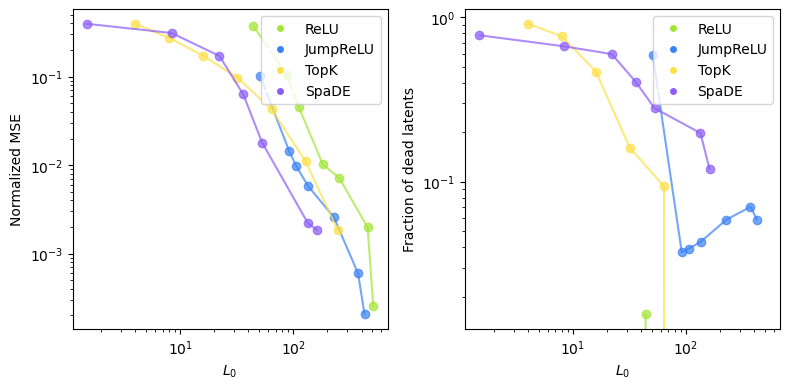

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
#choose 4 colors from a cmap
# cmap = plt.get_cmap('Set2')
# colors_sae = [cmap(i/len(saeorder)) for i in range(len(saeorder))]


ax = axes[0]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    mse_vals = torch.tensor([mse_all[i]/datavar for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], mse_vals[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Normalized MSE')

ax = axes[1]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    numdead = torch.tensor([numdeadlatents_all[i]/width for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], numdead[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Fraction of dead latents')

plt.tight_layout()

In [14]:
# stableranksdata = []
# stablerankslatent = []

# for i in range(len(exptnames)):
#     srd = torch.trace(Cdatacos[i])/torch.linalg.matrix_norm(Cdatacos[i], ord=2)
#     stableranksdata.append(srd.item())

#     srl = torch.trace(Clatentcos[i])/torch.linalg.matrix_norm(Clatentcos[i], ord=2)
#     stablerankslatent.append(srl.item())
#     print(f'{exptnames[i]}: {srd.item()}, {srl.item()}')

In [22]:
# stableranksdata = torch.tensor(stableranksdata)
# stablerankslatent = torch.tensor(stablerankslatent)

stableranks = torch.load('./results_analysis/stableranks.pt')
stableranksdata = stableranks['stableranksdata']
stablerankslatent = stableranks['stablerankslatent']

# torch.save({'stableranksdata': stableranksdata, 'stablerankslatent': stablerankslatent}, \
#     './results_analysis/stableranks.pt')

/tmp/ipykernel_3648163/397148896.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stableranks = torch.load('./results_analysis/stableranks.pt')


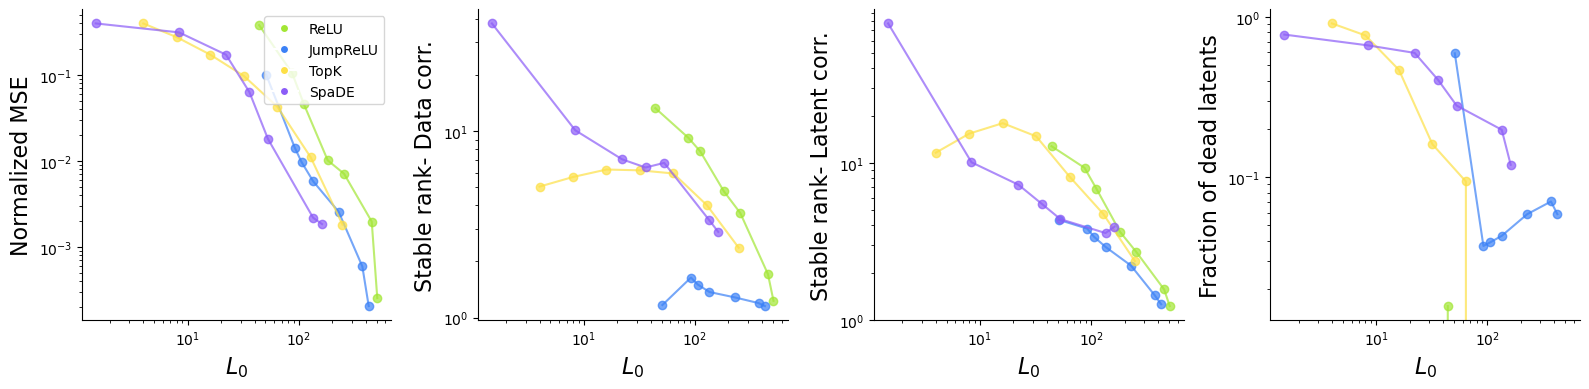

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))


ax = axes[0]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    mse_vals = torch.tensor([mse_all[i]/datavar for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], mse_vals[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$', fontsize=16)
ax.set_ylabel('Normalized MSE', fontsize=16)


ax = axes[3]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    numdead = torch.tensor([numdeadlatents_all[i]/width for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], numdead[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$', fontsize=16)
ax.set_ylabel('Fraction of dead latents', fontsize=16)

ax = axes[1]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srdata = torch.tensor([stableranksdata[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srdata[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$', fontsize=16)
ax.set_ylabel('Stable rank- Data corr.', fontsize=16)


ax = axes[2]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srlatent = torch.tensor([stablerankslatent[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srlatent[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$', fontsize=16)
ax.set_ylabel('Stable rank- Latent corr.', fontsize=16)

for ax in axes.flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#add xticks at 5e0, 10 for all axes
# for ax in axes.flatten():
#     ax.set_xticks([1, 10])
#     ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())



plt.tight_layout()
# plt.savefig('./figs/appendix_hetero_nmse.pdf', bbox_inches='tight', dpi=300)

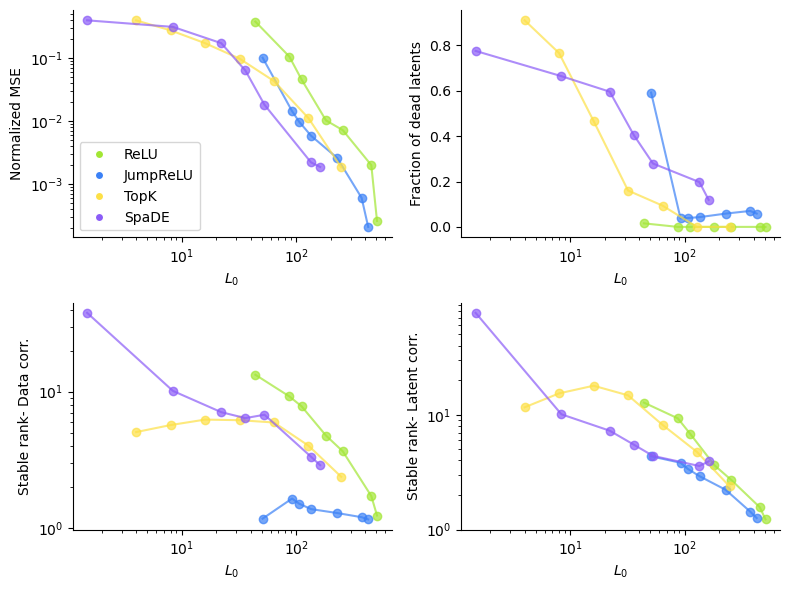

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))


ax = axes[0,0]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    mse_vals = torch.tensor([mse_all[i]/datavar for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], mse_vals[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Normalized MSE')


ax = axes[0,1]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    numdead = torch.tensor([numdeadlatents_all[i]/width for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], numdead[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Fraction of dead latents')

ax = axes[1,0]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srdata = torch.tensor([stableranksdata[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srdata[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Stable rank- Data corr.')


ax = axes[1,1]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srlatent = torch.tensor([stablerankslatent[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srlatent[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.7)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
# ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Stable rank- Latent corr.')

for ax in axes.flatten():
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

#add xticks at 5e0, 10 for all axes
# for ax in axes.flatten():
#     ax.set_xticks([1, 10])
#     ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())



plt.tight_layout()
# plt.savefig('./figs/appendix_hetero_nmse.pdf', bbox_inches='tight', dpi=300)

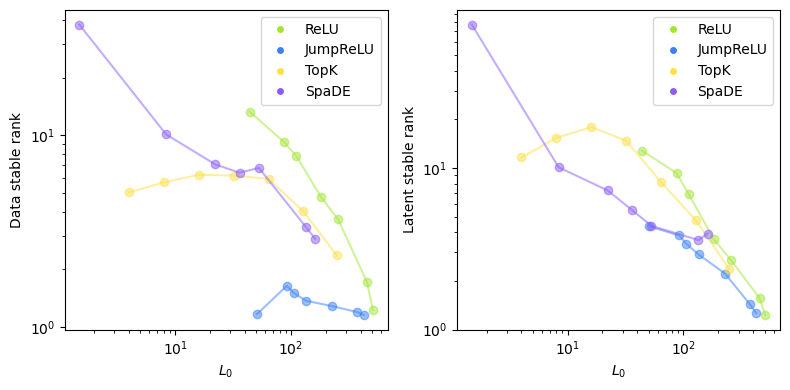

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))


ax = axes[0]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srdata = torch.tensor([stableranksdata[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srdata[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.5)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Data stable rank')


ax = axes[1]
for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    srlatent = torch.tensor([stablerankslatent[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], srlatent[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.5)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Latent stable rank')

plt.tight_layout()

Text(0, 0.5, 'Number of dead latents')

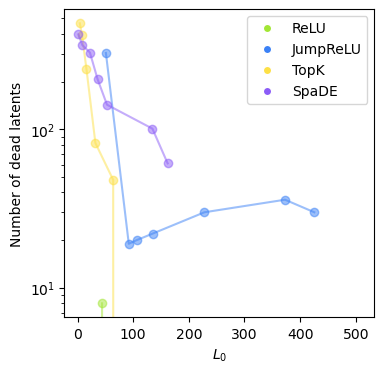

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))

for saetype in saeorder:
    indices = [i for i in range(len(exptnames)) if saetypes[i] == saetype]
    l0_vals = torch.tensor([l0_all[i] for i in indices])
    numdead = torch.tensor([numdeadlatents_all[i] for i in indices])
    l0sortindices = np.argsort(l0_vals).squeeze()

    ax.plot(l0_vals[l0sortindices], numdead[l0sortindices], marker='o', linestyle='-', color=colors_sae[saeorder.index(saetype)], alpha=0.5)

#custom legend only showing the 4 colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=saenames_plot[i], markerfacecolor=colors_sae[i], markersize=6) for i in range(len(saenames_plot))]
ax.legend(handles=legend_elements, loc='upper right')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$L_0$')
ax.set_ylabel('Number of dead latents')

In [27]:
numdeadlatents_all= torch.tensor(numdeadlatents_all)

In [30]:
[l0_all[plot_indices[i]] for i in range(len(plot_indices))]

[tensor(111.3386), tensor(134.7942), tensor(32.), tensor(52.8298)]

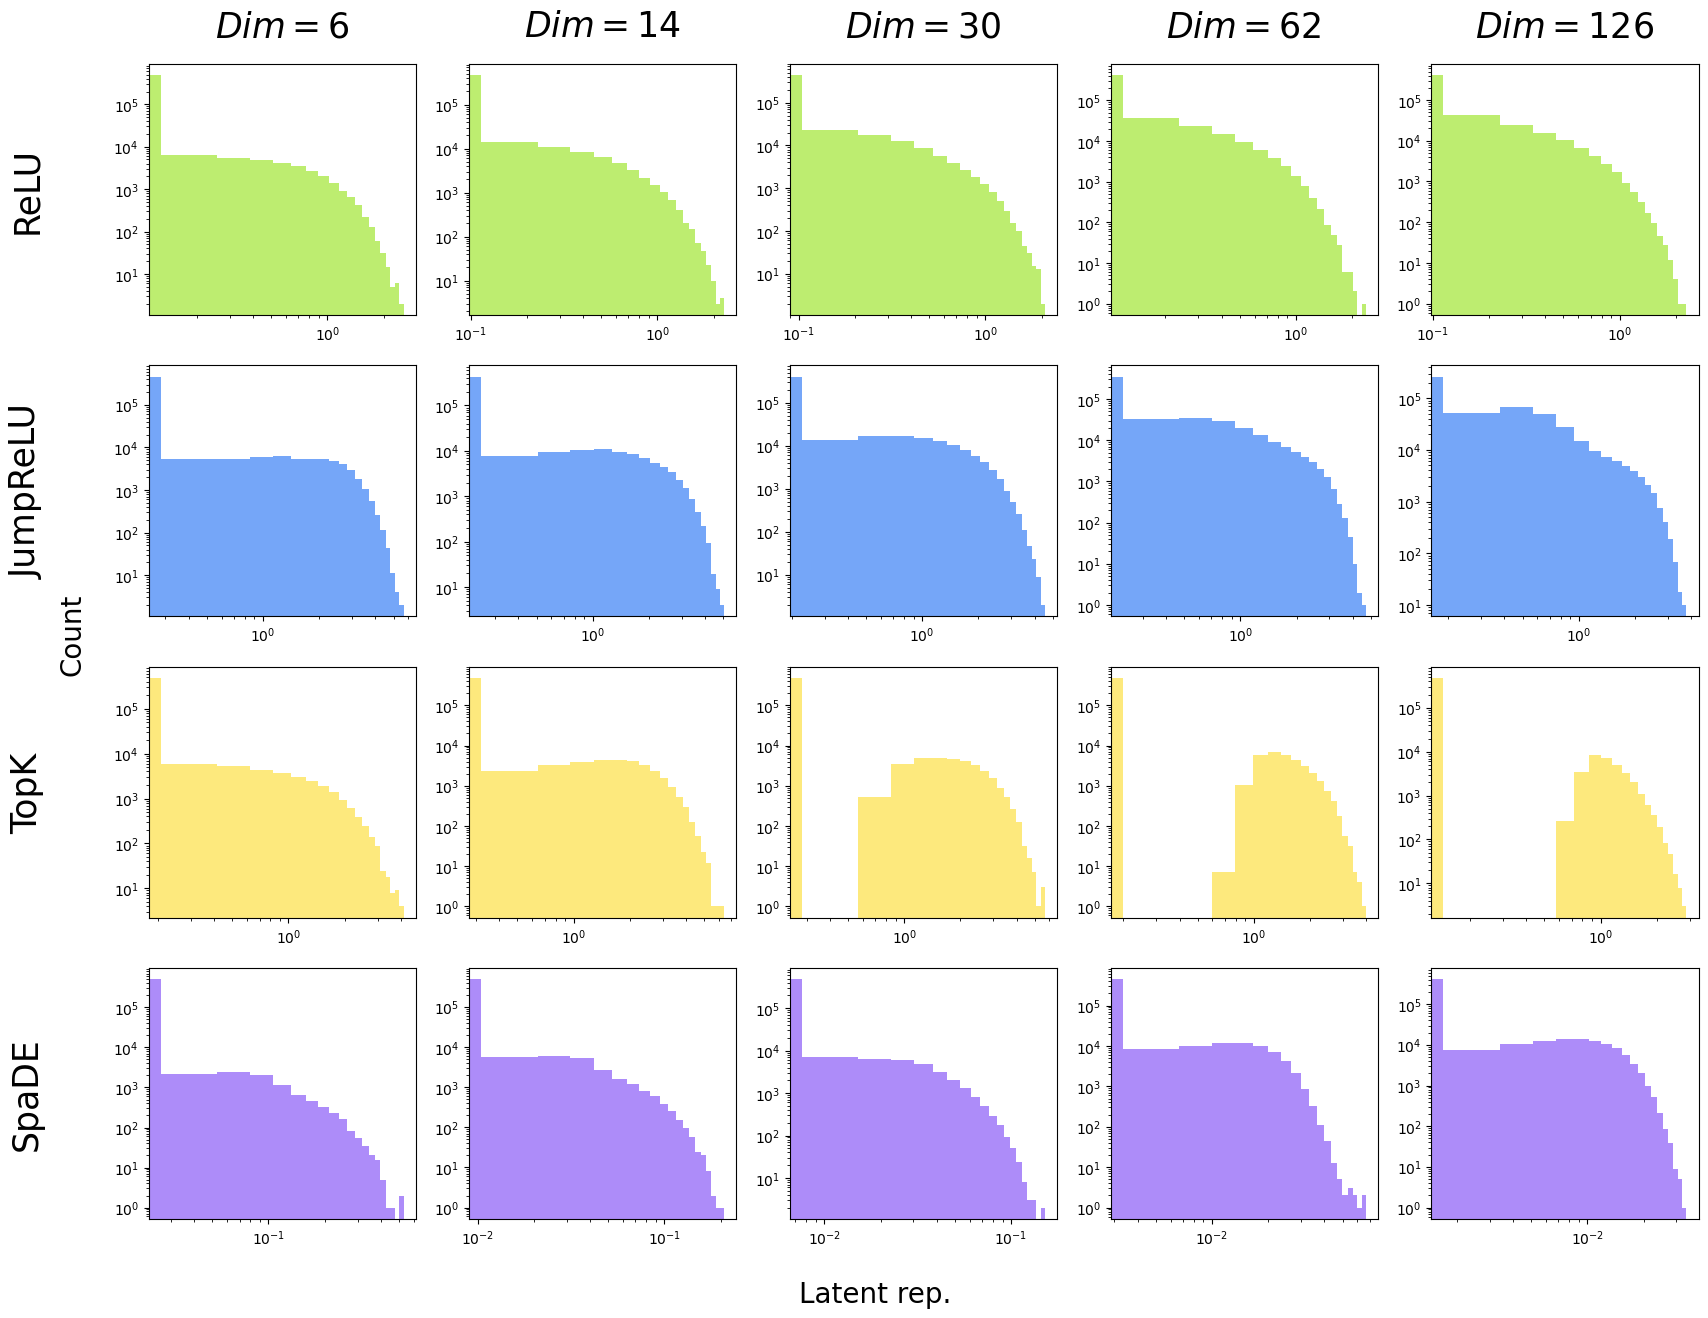

In [31]:
#plot histograms of latent reps for each concept and each sae- in a big 4 X 6 plot

fig, ax = plt.subplots(4, 5, figsize=(20, 15))
for i in range(len(exptnames)):
    if i not in plot_indices:
        continue
    rowid = saeorder.index(saetypes[i])
    for c in range(num_concepts):

        ax[rowid, c].hist(latent_reps_all[i][labels_subset==c,:].flatten(), bins=20, alpha=0.7, color=colors_sae[saeorder.index(saetypes[i])])
        if rowid == 0:
            ax[rowid, c].set_title(f'$Dim={intrinsic_dims[c]}$', fontsize=25, pad=20)
        if c==0:
            ax[rowid, c].set_ylabel(saenames_plot[rowid], fontsize=25, labelpad=50)
        ax[rowid, c].set_yscale('log')
        ax[rowid, c].set_xscale('log')
# Add a single y-axis label for all rows
fig.text(0.08, 0.5, "Count", va='center', rotation='vertical', fontsize=20)
fig.text(0.45, 0.06, "Latent rep.", va='center', rotation='horizontal', fontsize=20)


# plt.savefig('./figs/appendix_heterogeneity_latenthist.pdf', bbox_inches='tight', dpi=300)

In [23]:
Clatentcos_active = []

for i in range(len(exptnames)):
    deadrows = Clatentcos[i].sum(dim=0) <1e-10
    cmat = Clatentcos[i][:,~deadrows]
    cmat = cmat[~deadrows,:]
    Clatentcos_active.append(cmat)

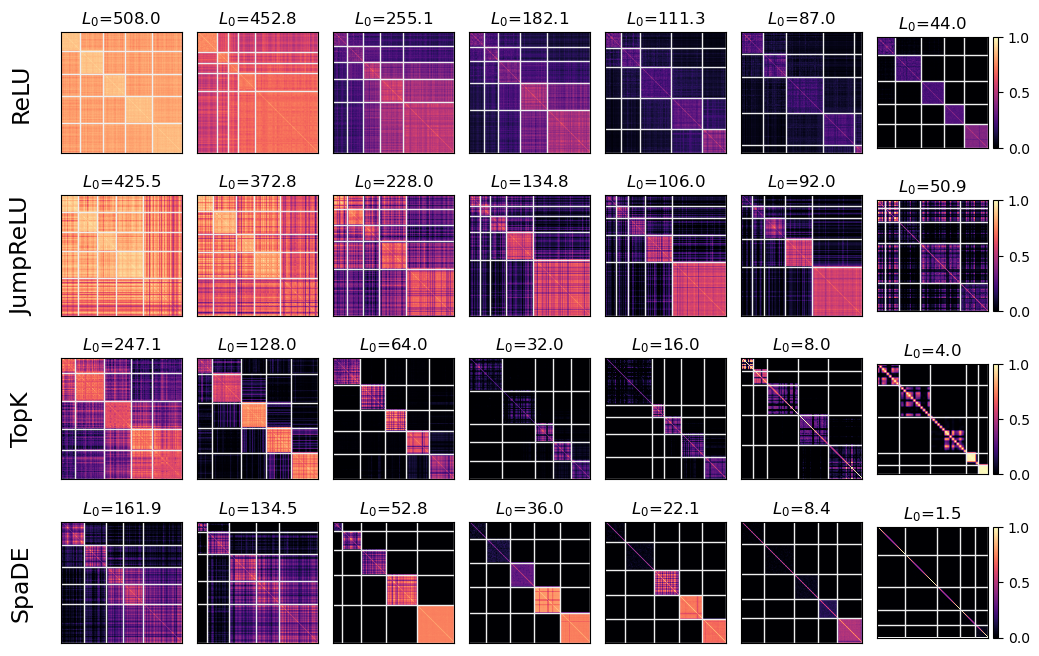

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

kvalues_order = [256, 128, 64, 32, 16, 8, 4]
fig, ax = plt.subplots(len(set(saetypes)), 7, figsize=(1.5*7, 1.5*4.5))
for i in range(len(exptnames)):
    if saetypes[i]!='topk_relu':
        if saetypes[i]=='relu':
            gammvals = gammavals_relu
        elif saetypes[i]=='jumprelu':
            gammvals = gammavals_jumprelu
        elif saetypes[i]=='sparsemax_dist':
            gammvals = gammavals_spade
        gami = float(exptnames[i].split('gamreg')[1].split('_')[0])
        loc = gammvals.index(gami)
    else:
        kval_i = int(exptnames[i].split('topk_relu_k')[1].split('_')[0])
        loc = kvalues_order.index(kval_i)
    
    rowid = saeorder.index(saetypes[i])
    concepts_now = concepts_of_latents_all[i][order_by_concept_all[i]]
    numlatents_perconc = [torch.sum(concepts_now==j).item() for j in range(num_concepts)]
    latentconcboundarylocs = np.cumsum(numlatents_perconc)
    heatmap = ax[rowid, loc].imshow(Clatentcos_active[i].cpu(), cmap='magma', vmin=0, vmax=1, extent=[0, Clatentcos_active[i].shape[0], Clatentcos_active[i].shape[1], 0])
    ax[rowid, loc].hlines(latentconcboundarylocs, 0, Clatentcos_active[i].shape[0], colors='#EFEFEF', linewidth=1)
    ax[rowid, loc].vlines(latentconcboundarylocs, 0, Clatentcos_active[i].shape[1], colors='#EFEFEF',linewidth=1)
    # ax[rowid, loc].set_title(exptnames[i])
    if loc==0:
        ax[rowid, 0].set_ylabel(saenames_plot[saeorder.index(saetypes[i])], fontsize=17, labelpad=20)
    # if rowid==0:
    # if saetypes[i]=='topk_relu':
    #     ax[rowid, loc].set_title(f"k={kval_i}")
    # else:
    ax[rowid, loc].set_title(f"$L_0$={l0_all[i]:.1f}")
    ax[rowid, loc].set_xticks([])
    ax[rowid, loc].set_yticks([])
    if loc==6:
        divider = make_axes_locatable(ax[rowid, loc])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(heatmap, cax=cax, orientation='vertical')
# fig.text(0.08, 0.5, "Count", va='center', rotation='vertical', fontsize=20)
# fig.text(0.45, 0.06, "Latent rep.", va='center', rotation='horizontal', fontsize=20)

plt.tight_layout()
# plt.savefig('./figs/appendix_hetero_latentcorr.pdf', bbox_inches='tight', dpi=300)

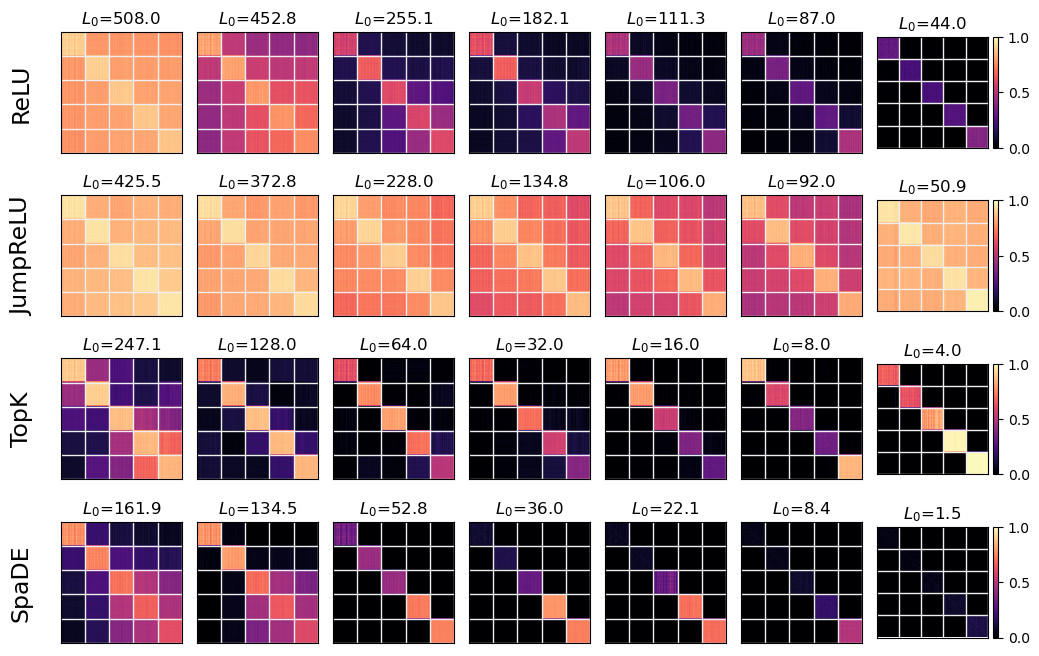

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

kvalues_order = [256, 128, 64, 32, 16, 8, 4]
fig, ax = plt.subplots(len(set(saetypes)), 7, figsize=(1.5*7, 1.5*4.5))
for i in range(len(exptnames)):
    if saetypes[i]!='topk_relu':
        if saetypes[i]=='relu':
            gammvals = gammavals_relu
        elif saetypes[i]=='jumprelu':
            gammvals = gammavals_jumprelu
        elif saetypes[i]=='sparsemax_dist':
            gammvals = gammavals_spade
        gami = float(exptnames[i].split('gamreg')[1].split('_')[0])
        loc = gammvals.index(gami)
    else:
        kval_i = int(exptnames[i].split('topk_relu_k')[1].split('_')[0])
        loc = kvalues_order.index(kval_i)
    
    rowid = saeorder.index(saetypes[i])
    
    heatmap = ax[rowid, loc].imshow(Cdatacos[i].cpu(), cmap='magma', vmin=0, vmax=1, extent=[0, Cdatacos[i].shape[0], Cdatacos[i].shape[1], 0])
    ax[rowid, loc].hlines([numpoints_perconcept*j for j in range(1, num_concepts+1)], 0, Cdatacos[i].shape[0], colors='#EFEFEF', linewidth=1)
    ax[rowid, loc].vlines([numpoints_perconcept*j for j in range(1, num_concepts+1)], 0, Cdatacos[i].shape[1], colors='#EFEFEF',linewidth=1)
    # ax[rowid, loc].set_title(exptnames[i])
    if loc==0:
        ax[rowid, 0].set_ylabel(saenames_plot[saeorder.index(saetypes[i])], fontsize=17, labelpad=20)
    # if rowid==0:
    # if saetypes[i]=='topk_relu':
    #     ax[rowid, loc].set_title(f"k={kval_i}")
    # else:
    ax[rowid, loc].set_title(f"$L_0$={l0_all[i]:.1f}")
    ax[rowid, loc].set_xticks([])
    ax[rowid, loc].set_yticks([])
    if loc==6:
        divider = make_axes_locatable(ax[rowid, loc])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        fig.colorbar(heatmap, cax=cax, orientation='vertical')
# fig.text(0.08, 0.5, "Count", va='center', rotation='vertical', fontsize=20)
# fig.text(0.45, 0.06, "Latent rep.", va='center', rotation='horizontal', fontsize=20)

plt.tight_layout()
# plt.savefig('./figs/appendix_hetero_datacorr.pdf', bbox_inches='tight', dpi=300)

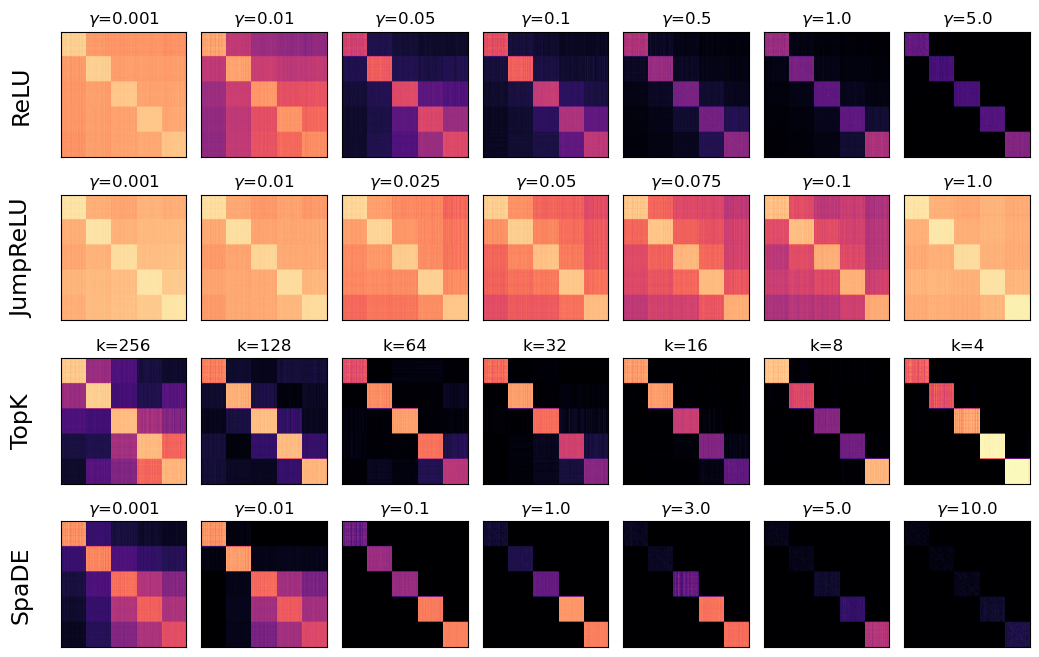

In [25]:
kvalues_order = [256, 128, 64, 32, 16, 8, 4]
fig, ax = plt.subplots(len(set(saetypes)), 7, figsize=(1.5*7, 1.5*4.5))
for i in range(len(exptnames)):
    if saetypes[i]!='topk_relu':
        if saetypes[i]=='relu':
            gammvals = gammavals_relu
        elif saetypes[i]=='jumprelu':
            gammvals = gammavals_jumprelu
        elif saetypes[i]=='sparsemax_dist':
            gammvals = gammavals_spade
        gami = float(exptnames[i].split('gamreg')[1].split('_')[0])
        loc = gammvals.index(gami)
    else:
        kval_i = int(exptnames[i].split('topk_relu_k')[1].split('_')[0])
        loc = kvalues_order.index(kval_i)
    
    rowid = saeorder.index(saetypes[i])
    ax[rowid, loc].imshow(Cdatacos[i].cpu(), cmap='magma', vmin=0, vmax=1)
    # ax[rowid, loc].set_title(exptnames[i])
    if loc==0:
        ax[rowid, 0].set_ylabel(saenames_plot[saeorder.index(saetypes[i])], fontsize=17, labelpad=20)
    # if rowid==0:
    if saetypes[i]=='topk_relu':
        ax[rowid, loc].set_title(f"k={kval_i}")
    else:
        ax[rowid, loc].set_title(f"$\gamma$={gami}")
    ax[rowid, loc].set_xticks([])
    ax[rowid, loc].set_yticks([])

# fig.text(0.08, 0.5, "Count", va='center', rotation='vertical', fontsize=20)
# fig.text(0.45, 0.06, "Latent rep.", va='center', rotation='horizontal', fontsize=20)

plt.tight_layout()
# plt.savefig('./figs/appendix_hetero_datacorr.pdf', bbox_inches='tight', dpi=300)